# Lab 1. Getting to know Pandas

## Welcome to Lab 2. In this lab we will learn how to use Pandas.

### Pandas is THE MOST important python library for any aspiring data scientist or business analyst. Please spend some significant amount of time learning it !

### 2.1. Let's load needed libraries

In [1]:
# we import the library pandas and give it the "pd" kickname
import pandas as pd

In [2]:
import seaborn as sns

### 2.2 Let's load an external dataset

#### Most of the time you will be accessing external, potentially large, datasets

In [3]:
# we use pandas.read_csv() function to access the file "gapminder.tsv" stored in a remote location 

# the remote location is: https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/

# with the argument sep='\t' we indicate that the columns are separated by tabs rather than commas.

df = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/main/data/gapminder.tsv', sep='\t')



In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
type(df)

pandas.core.frame.DataFrame

#### df is a DataFrame.DataFrames are core entities in data analytics

### 2.3. Let's observe our data

In [6]:
# we show the first 5 rows
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
# we show the size of our dataset
df.shape

(1704, 6)

In [8]:
# we get some more detailed info on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


#### We observe that the dataframe is consisted of 6 columns. year is a column of integers, lifeExp a column of floats, country is a generic object colum
#### Our dataframe has 1704 datapoints

### 2.4 Let's extract some columns from our data

In [9]:
# we can extract a column by its name
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [10]:
# we can extract several columns at the same time
df[['country','lifeExp']]

,country,lifeExp
0,Afghanistan,28.801
1,Afghanistan,30.332
2,Afghanistan,31.997
3,Afghanistan,34.020
4,Afghanistan,36.088
...,...,...
1699,Zimbabwe,62.351
1700,Zimbabwe,60.377
1701,Zimbabwe,46.809
1702,Zimbabwe,39.989


### 2.5 Let's extract some rows from our data

In [11]:
# let's extract the first row. Python starts counting from zero
df.iloc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [12]:
# let's extract the 100th row. Python starts counting from zero
df.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [13]:
# we can even select multiple rows

rowsToSelect=[0,99,999]

df.iloc[rowsToSelect]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [14]:
# or even select rows within a given range. From 10 to 20

In [15]:
df.iloc[10:20]

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
12,Albania,Europe,1952,55.230,1282697,1601.056136
13,Albania,Europe,1957,59.280,1476505,1942.284244
14,Albania,Europe,1962,64.820,1728137,2312.888958
15,Albania,Europe,1967,66.220,1984060,2760.196931
16,Albania,Europe,1972,67.690,2263554,3313.422188
17,Albania,Europe,1977,68.930,2509048,3533.003910
18,Albania,Europe,1982,70.420,2780097,3630.880722
19,Albania,Europe,1987,72.000,3075321,3738.932735


### 2.6 Grouped and aggregated calculations

There are several initial questions that we can ask ourselves:
1. For each year in our data, what was the average life expectancy? What is the average life expectancy, population, and GDP?
2. What if we stratify the data by continent and perform the same calculations?
3. How many countries are listed in each continent?



#### Question: What was the average life expectancy evolution across time ?

In [16]:
df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [17]:
# the following command groups data by the columm "year" then extracts the column lifeExp and computes the mean
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

### the following figure provides a visual representation of the operation we have just performed

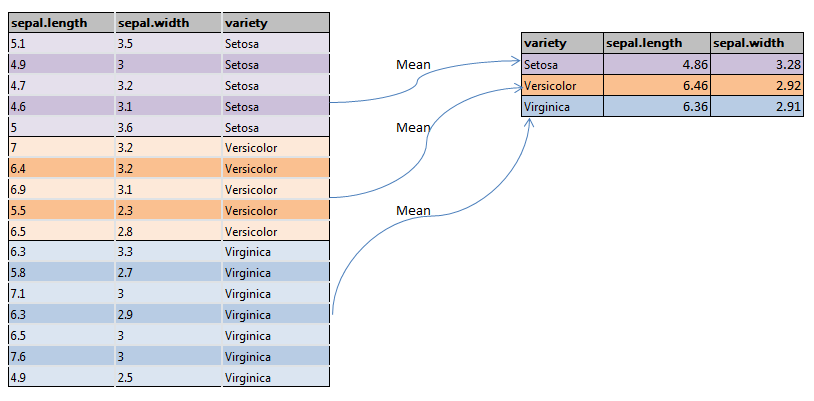

In [18]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/thousandoaks/BEMM458/main/images/Generic-Groupby-mean.png")

#### Question: What was the average life expectancy evolution across time AND continent ?

In [19]:
# the following command groups data by the columm "year" AND continent then extracts the column lifeExp and computes the mean
df.groupby(['year','continent'])['lifeExp'].mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

#### Question: What was the average life expectancy evolution AND GDP per capita across time AND continent ?

In [20]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

#### Question: How many countries are there in each continent ?

In [21]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [22]:
#  we group by continent then extract the country column and count unique occurrences
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### 2.7. Basic plotting

#### Visualization. Evolution of life expectancy across time

In [23]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [24]:
# Let's save the previous operation as a new variable

lifeExpectancyEvolution=df.groupby('year')['lifeExp'].mean()

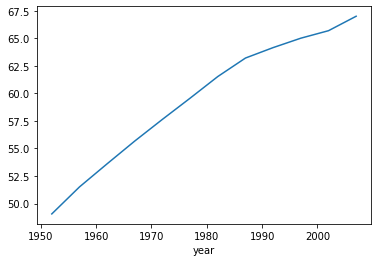

In [25]:
# let's plot the result
lifeExpectancyEvolution.plot()

#### Visualization. Evolution of life expectancy accross time and continent

In [26]:
lifeExpectancyEvolutionContinent=df.groupby(['continent','year'])['lifeExp'].mean()

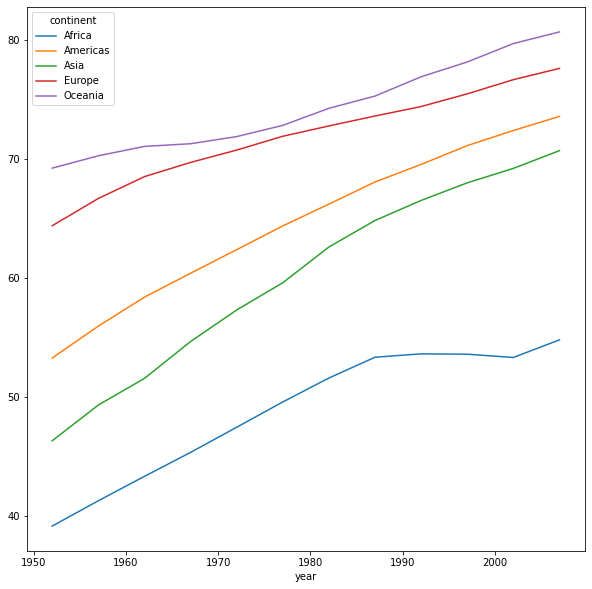

In [27]:
lifeExpectancyEvolutionContinent.unstack(level=0).plot(kind='line', subplots=False,figsize=(10,10))

# Further References:

### Chapters 1,2,3 from the reference book: Pandas for Everyone. Available online at Exeter Library

### 10 Minute to pandas tutorial. https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

# Challenge yourself !

### What was the maximum life expectancy evolution across time AND country ?

### Hint 1: use the followint command to display all rows in a pandas DataFrame
pandas.set_option('display.max_rows', None)

### Hint 2: look on the pandas documentation how to compute the maximum after a groupby operation
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

### Try to plot the previous result